In [1]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import swifter

Import Dataset CSV with Pandas

In [2]:
df = pd.read_csv("Dataset\dataset_siap.csv")
# print(df)

Lower Case with Pandas

In [3]:
df = df.astype(str).apply(lambda x: x.str.lower())

Remove Puncutuation

In [4]:
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z]')
def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text

df['Kalimat']= df['Kalimat'].apply(clean_punct)


Tekonize with NLTK

In [5]:
df['Kalimat'] = df.apply(lambda row: nltk.word_tokenize(row['Kalimat']), axis=1)

Stopwords with NLTK

In [6]:
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['Kalimat'] = df['Kalimat'].apply(stopwords_removal)

In [7]:
df

,Kalimat,Kelas
0,"[tampilkan, kartu, hasil, studi, semester, 1]",id
1,"[tampilkan, kartu, hasil, studi, semester, 2]",id
2,"[tampilkan, kartu, hasil, studi, semester, 3]",id
3,"[tampilkan, kartu, hasil, studi, semester, 4]",id
4,"[tampilkan, kartu, hasil, studi, semester, 5]",id
...,...,...
324,"[alasanlandasan, chatbot]",ood
325,"[berbahasa, inggris]",ood
326,"[tere, liye, menerbitkan, buku, kali]",ood
327,[minum],ood


Stemming with Sastrawi

In [8]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)
term_dict = {}

for document in df['Kalimat']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)


In [9]:
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['Stemming'] = df['Kalimat'].swifter.apply(get_stemmed_term)

Pandas Apply: 100%|██████████| 329/329 [00:00<00:00, 41099.81it/s]


In [10]:
df['Lowers'] = [" ".join(review) for review in df['Stemming'].values]

TF-IDF

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(max_features=500)
X_tfidf = vectorizer_tfidf.fit_transform(df['Lowers'])
print(X_tfidf)

  (0, 329)	0.338021725481683
  (0, 348)	0.5159935415403859
  (0, 127)	0.536351574494828
  (0, 171)	0.5257479398471753
  (0, 361)	0.23538918937446063
  (1, 329)	0.338021725481683
  (1, 348)	0.5159935415403859
  (1, 127)	0.536351574494828
  (1, 171)	0.5257479398471753
  (1, 361)	0.23538918937446063
  (2, 329)	0.338021725481683
  (2, 348)	0.5159935415403859
  (2, 127)	0.536351574494828
  (2, 171)	0.5257479398471753
  (2, 361)	0.23538918937446063
  (3, 329)	0.338021725481683
  (3, 348)	0.5159935415403859
  (3, 127)	0.536351574494828
  (3, 171)	0.5257479398471753
  (3, 361)	0.23538918937446063
  (4, 329)	0.338021725481683
  (4, 348)	0.5159935415403859
  (4, 127)	0.536351574494828
  (4, 171)	0.5257479398471753
  (4, 361)	0.23538918937446063
  :	:
  (320, 152)	0.6637247695719274
  (320, 145)	0.5130326434587582
  (320, 167)	0.5443040850502692
  (321, 394)	0.6740799129839264
  (321, 380)	0.6293176585616035
  (321, 397)	0.38674999099434154
  (322, 170)	0.7309598423329132
  (322, 322)	0.682420478

In [49]:
pickle.dump(X_tfidf, open("tfidf.pkl", "wb"))

In [12]:
tfidf = pd.DataFrame(X_tfidf.todense().T, 
index=vectorizer_tfidf.get_feature_names(),
columns=[f'D{i+1}' for i in range(len(df['Lowers']))])

In [13]:
df['TFIDF_Skitlearn'] = X_tfidf

In [14]:
df.to_csv("Text_Preprocessing.csv")

WORD CLOUD

In [15]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [16]:
from collections import Counter
# join_text = " ".join(data_training.text)
text_id = " ".join(df[df['Kelas']!="ood"]['Lowers'].values)
text_ood = " ".join(df[df['Kelas']=="ood"]['Lowers'].values)
# counter_obj = Counter(join_text.split(" "))
# counter_obj.most_common(50)
# print (join_text)

WORD CLOAD DATA ID

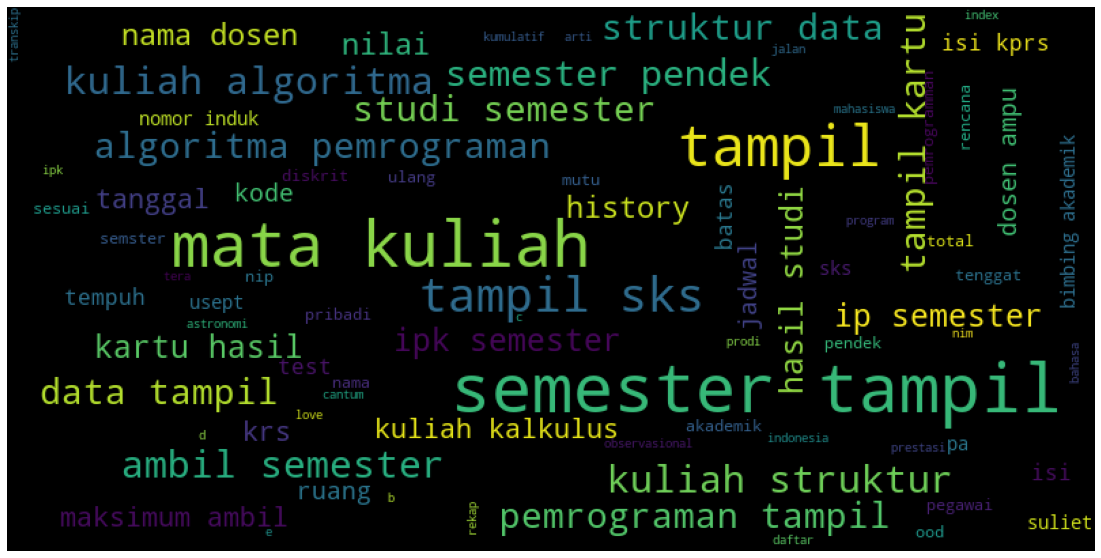

In [17]:
# Create and generate a word cloud image:
wordcloud_id = WordCloud(max_font_size=50, background_color="black", width=800, height=400).generate(text_id)
wordcloud_ood = WordCloud(max_font_size=50, background_color="black", width=800, height=400).generate(text_ood)

# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_id)
plt.axis("off")
plt.show()

WORD CLOAD DATA OOD

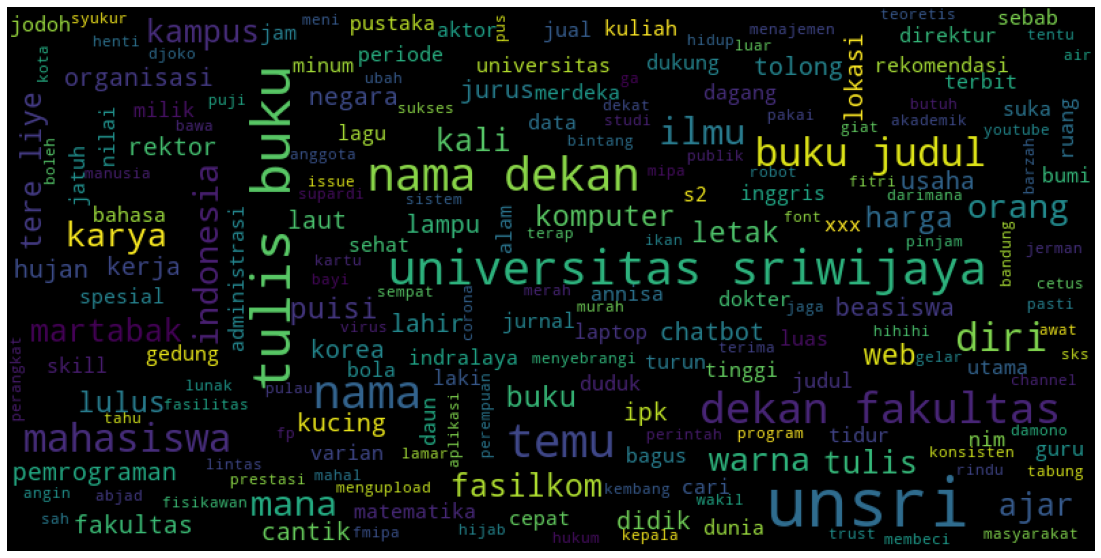

In [18]:
# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_ood)
plt.axis("off")
plt.show()

KLASIFIKASI

In [19]:
df

,Kalimat,Kelas,Stemming,Lowers,TFIDF_Skitlearn
0,"[tampilkan, kartu, hasil, studi, semester, 1]",id,"[tampil, kartu, hasil, studi, semester, 1]",tampil kartu hasil studi semester 1,"(0, 329)\t0.338021725481683\n (0, 348)\t0.5..."
1,"[tampilkan, kartu, hasil, studi, semester, 2]",id,"[tampil, kartu, hasil, studi, semester, 2]",tampil kartu hasil studi semester 2,"(0, 329)\t0.338021725481683\n (0, 348)\t0.5..."
2,"[tampilkan, kartu, hasil, studi, semester, 3]",id,"[tampil, kartu, hasil, studi, semester, 3]",tampil kartu hasil studi semester 3,"(0, 329)\t0.338021725481683\n (0, 348)\t0.5..."
3,"[tampilkan, kartu, hasil, studi, semester, 4]",id,"[tampil, kartu, hasil, studi, semester, 4]",tampil kartu hasil studi semester 4,"(0, 329)\t0.338021725481683\n (0, 348)\t0.5..."
4,"[tampilkan, kartu, hasil, studi, semester, 5]",id,"[tampil, kartu, hasil, studi, semester, 5]",tampil kartu hasil studi semester 5,"(0, 329)\t0.338021725481683\n (0, 348)\t0.5..."
...,...,...,...,...,...
324,"[alasanlandasan, chatbot]",ood,"[alasanlandasan, chatbot]",alasanlandasan chatbot,"(0, 329)\t0.338021725481683\n (0, 348)\t0.5..."
325,"[berbahasa, inggris]",ood,"[bahasa, inggris]",bahasa inggris,"(0, 329)\t0.338021725481683\n (0, 348)\t0.5..."
326,"[tere, liye, menerbitkan, buku, kali]",ood,"[tere, liye, terbit, buku, kali]",tere liye terbit buku kali,"(0, 329)\t0.338021725481683\n (0, 348)\t0.5..."
327,[minum],ood,[minum],minum,"(0, 329)\t0.338021725481683\n (0, 348)\t0.5..."


In [42]:
# vectorizer_tfidf = TfidfVectorizer(max_features=500)

In [21]:
y=df.Kelas
X=vectorizer_tfidf.fit_transform(df['Lowers'])

penentuan paramaters

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {
    'kernel':['linear', 'rbf', 'poly', 'sigmoid'],
    'C' : [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=svm.SVC(random_state=0),
param_grid=parameters,
n_jobs=6,
verbose=1,
scoring='accuracy'
)

grid_search.fit(X, y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\febyk\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=SVC(random_state=0), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [27]:
print(grid_search.best_estimator_)

print(f'Best Score : {grid_search.best_score_}')
best_params = grid_search.best_estimator_.get_params()

print(f'Best Parameters : {grid_search.best_score_}')
for param in parameters:
    print(f'\t{param}: {best_params[param]}')

SVC(C=10, kernel='sigmoid', random_state=0)
Best Score : 0.9878787878787879
Best Parameters : 0.9878787878787879
	kernel: sigmoid
	C: 10
	gamma: scale


In [28]:
from sklearn import svm
model = svm.SVC(kernel='sigmoid', C=10, gamma='scale')
model.fit(X,y)

SVC(C=10, kernel='sigmoid')

Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10,)
print(scores)

[1.         1.         1.         1.         1.         1.
 1.         0.90909091 0.96969697 1.        ]


C:\Users\febyk\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [30]:
scores.mean()

0.9878787878787879

In [31]:
Input = 'temukan lokasi unsri'
Input = Input.lower()
Input = clean_punct(Input)
Input = stemmed_wrapper(Input)
Input = vectorizer_tfidf.transform([Input])
predict = model.predict(Input)
print(predict)

['ood']


In [32]:
Input = 'tampilkan kartu hasil studi mahasiswa nim'
Input = Input.lower()
Input = clean_punct(Input)
Input = stemmed_wrapper(Input)
Input = vectorizer_tfidf.transform([Input])
predict = model.predict(Input)
print(predict)

['id ']


In [45]:
Input = "tampilkan khs semester 5"
Input = Input.lower()
Input = clean_punct(Input)
Input = stemmed_wrapper(Input)
Input = vectorizer_tfidf.transform([Input])
predict = model.predict(Input)
print(predict)

['id ']


SAVE MODEL

In [35]:
import pickle
with open("model", "wb") as r:
    pickle.dump(model,r)

LOAD MODEL

In [36]:
with open("model", "rb") as r:
    model = pickle.load(r)